In [1]:
# Paso 1: Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# Paso 2: Preparar las rutas de entrada y salida
# Ruta del video  en Google Drive
from google.colab import files

# Definir las rutas de los archivos
#input_path = '/content/drive/MyDrive/Colab Notebooks/CursoIA/Shopping Mall720p-h264.mp4'
input_path = '/content/drive/MyDrive/Colab Notebooks/CursoIA/shoppingmall.mp4'
path = '/content/drive/My Drive/Colab Notebooks/CursoIA/'

In [3]:
# Paso 3 Comprobamar que el archivo existe
import os
if not os.path.exists(input_path):
    raise FileNotFoundError(f"El archivo de video {input_path} no fue encontrado.")


Tamaño de la imagen: 1020 píxeles de ancho x 500 píxeles de alto


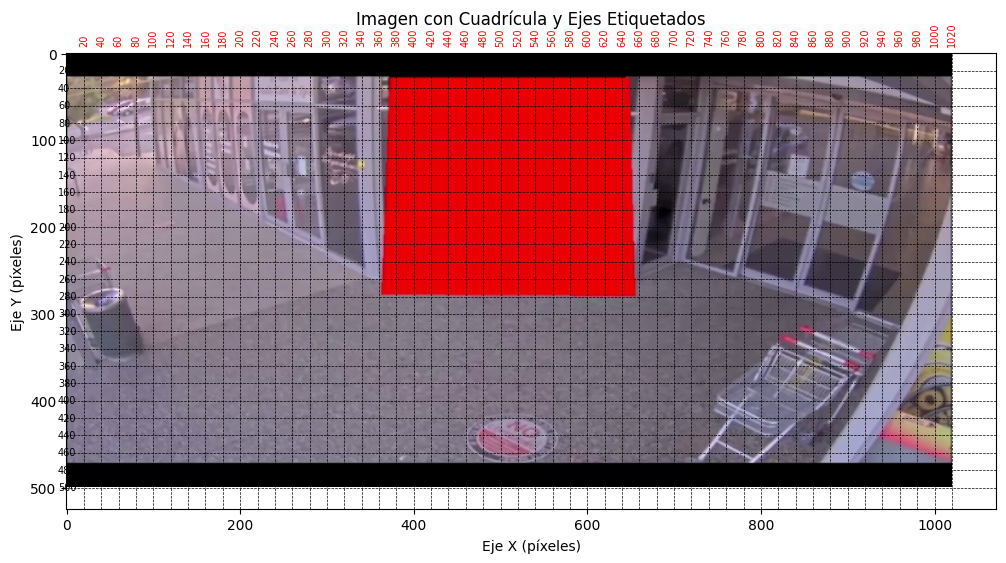

In [ ]:
# Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Para mostrar imágenes en Google Colab

# Inicializar seguimiento de objetos y áreas
area_entrada = [(708, 239), (690, 253), (945, 334), (959, 317)]  # Entrada
area_salida = [(681, 257), (677, 265), (927, 353), (937, 342)]  # Salida

# Función para mostrar una imagen con una cuadrícula ajustada al tamaño del frame y ejes con etiquetas
def show_image_with_grid(image, grid_size=20):
    height, width, _ = image.shape

    # Imprimir el tamaño de la imagen en píxeles
    print(f"Tamaño de la imagen: {width} píxeles de ancho x {height} píxeles de alto")

    # Calcular las divisiones exactas de la cuadrícula
    x_divisions = width // grid_size
    y_divisions = height // grid_size

    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Dibujar la cuadrícula
    for i in range(1, x_divisions + 1):
        x_pos = i * grid_size
        plt.axvline(x=x_pos, color='black', linestyle='--', linewidth=0.5)
        plt.text(x_pos, -10, f'{x_pos}', color='red', fontsize=7, ha='center', rotation=90)  # Etiqueta en el eje x

    for j in range(1, y_divisions + 1):
        y_pos = j * grid_size
        plt.axhline(y=y_pos, color='black', linestyle='--', linewidth=0.5)
        plt.text(-10, y_pos, f'{y_pos}', color='black', fontsize=7, va='center')  # Etiqueta en el eje y


    plt.title("Imagen con Cuadrícula y Ejes Etiquetados\n")
    plt.xlabel("Eje X (píxeles)")
    plt.ylabel("Eje Y (píxeles)")
    plt.show()

# Función para procesar el video y mostrar la cuadrícula en el primer frame
def process_video_with_grid(input_path, resize_dim=(1020, 500)):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print("Error: No se pudo abrir el video.")
        return

    ret, frame = cap.read()
    if not ret:
        print("Error: No se pudo leer el frame.")
        return

    # Redimensionar el frame si es necesario
    frame_resized = cv2.resize(frame, resize_dim)

    # Mostrar el frame con la cuadrícula y ejes etiquetados
    show_image_with_grid(frame_resized)
    # Dibujar áreas de entrada y salida
    cv2.polylines(frame_resized, [np.array(area_entrada, np.int32)], True, (0, 0, 255), 2)
    cv2.polylines(frame_resized, [np.array(area_salida, np.int32)], True, (0, 255,120), 2)
    # Liberar el objeto de captura de video
    cap.release()

# Procesar el video y mostrar la cuadrícula
process_video_with_grid(input_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
FPS del video: 29.970025180663065
Resolución del video: 1920x1080
Cantidad de frames: 5951
Tamaño de la imagen: 1020 píxeles de ancho x 500 píxeles de alto


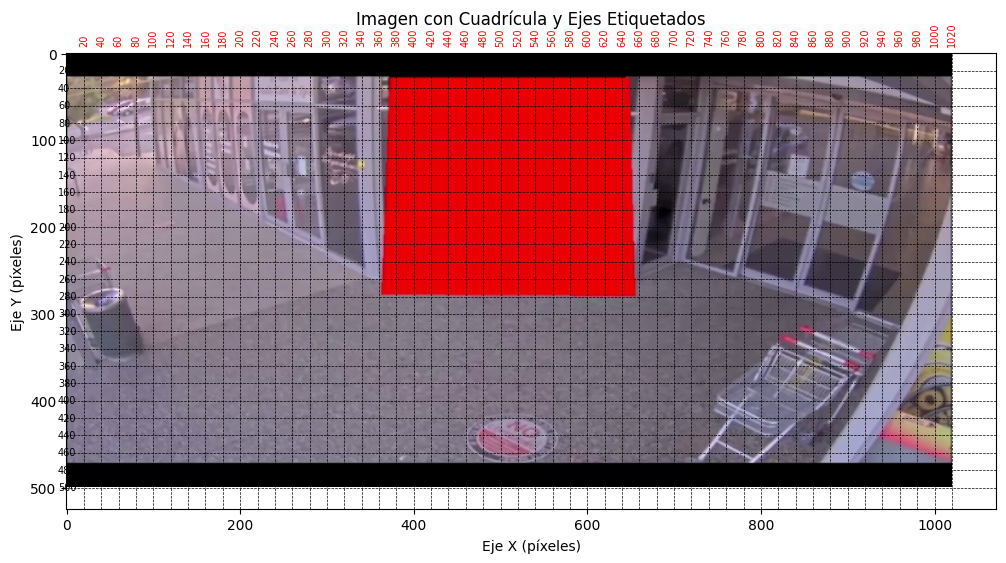

In [4]:
# Paso 1: Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paso 2: Preparar las rutas de entrada y salida
from google.colab import files

# Definir las rutas de los archivos
input_path = '/content/drive/MyDrive/Colab Notebooks/CursoIA/shoppingmall.mp4'
path = '/content/drive/My Drive/Colab Notebooks/CursoIA/'

# Paso 3: Comprobar que el archivo existe
import os
if not os.path.exists(input_path):
    raise FileNotFoundError(f"El archivo de video {input_path} no fue encontrado.")

# Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Para mostrar imágenes en Google Colab

# Inicializar seguimiento de objetos y áreas
area_entrada = [(708, 239), (690, 253), (945, 334), (959, 317)]  # Entrada
area_salida = [(681, 257), (677, 265), (927, 353), (937, 342)]  # Salida

# Función para mostrar una imagen con una cuadrícula ajustada al tamaño del frame y ejes con etiquetas
def show_image_with_grid(image, grid_size=20):
    height, width, _ = image.shape
    print(f"Tamaño de la imagen: {width} píxeles de ancho x {height} píxeles de alto")

    x_divisions = width // grid_size
    y_divisions = height // grid_size

    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    for i in range(1, x_divisions + 1):
        x_pos = i * grid_size
        plt.axvline(x=x_pos, color='black', linestyle='--', linewidth=0.5)
        plt.text(x_pos, -10, f'{x_pos}', color='red', fontsize=7, ha='center', rotation=90)

    for j in range(1, y_divisions + 1):
        y_pos = j * grid_size
        plt.axhline(y=y_pos, color='black', linestyle='--', linewidth=0.5)
        plt.text(-10, y_pos, f'{y_pos}', color='black', fontsize=7, va='center')

    plt.title("Imagen con Cuadrícula y Ejes Etiquetados\n")
    plt.xlabel("Eje X (píxeles)")
    plt.ylabel("Eje Y (píxeles)")
    plt.show()

# Función para procesar el video, mostrar la cuadrícula y los datos del video
def process_video_with_grid(input_path, resize_dim=(1020, 500)):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print("Error: No se pudo abrir el video.")
        return

    # Obtener y mostrar información del video
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"FPS del video: {fps}")
    print(f"Resolución del video: {frame_width}x{frame_height}")
    print(f"Cantidad de frames: {frame_count}")

    ret, frame = cap.read()
    if not ret:
        print("Error: No se pudo leer el frame.")
        return

    # Redimensionar el frame si es necesario
    frame_resized = cv2.resize(frame, resize_dim)

    # Mostrar el frame con la cuadrícula y ejes etiquetados
    show_image_with_grid(frame_resized)

    # Dibujar áreas de entrada y salida
    cv2.polylines(frame_resized, [np.array(area_entrada, np.int32)], True, (0, 0, 255), 2)
    cv2.polylines(frame_resized, [np.array(area_salida, np.int32)], True, (0, 255, 120), 2)

    # Liberar el objeto de captura de video
    cap.release()

# Procesar el video y mostrar la cuadrícula y datos
process_video_with_grid(input_path)
